In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance,calculate_performance_SP
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_adult():
    df = pd.read_csv('data/adult-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class-label'
    filename = "adult.abroca.pdf"
    df['Class-label'] = [1 if v == 1 else 0 for v in df['Class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_adult_reconstruction():
    df = pd.read_csv('data/adult-reconstruction-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'income_bin'
    filename = "adult_new.abroca.pdf"
    df['income_bin'] = [1 if v == ">50K" else 0 for v in df['income_bin']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_kdd():
    df = pd.read_csv('data/kdd-census-income-clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'income'
    filename = "kdd.abroca.pdf"
    df['income'] = [1 if v == ">50K" else 0 for v in df['income']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_german():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class-label'
    filename = "german.abroca.pdf"
    df['class-label'] = [1 if v == 1 else 0 for v in df['class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_bank():
    df = pd.read_csv('data/bank-full.csv')    
    protected_attribute = 'marital'
    majority_group_name = "Married"
    minority_group_name = "Non-Married"
    class_label = 'y'
    filename = "bank.abroca.pdf"
    df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_crime():
    df = pd.read_csv('data/communities_crime.csv')    
    protected_attribute = 'Black'
    majority_group_name = "Non-Black"
    minority_group_name = "Black"
    class_label = 'class'
    filename = "crime.abroca.pdf"
    #df['class'] = [1 if v == 1 else 0 for v in df['y']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def load_compas_recid():
    df = pd.read_csv('data/compas-scores-two-years_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Black"
    class_label = 'two_year_recid'
    filename = "compas.recid.abroca.pdf"
    #Remove all row without black and white
    df = df[(df['race']=='African-American') | (df['race'] == "Caucasian")]
    df['race'] = ['Black' if v == 'African-American' else "White" for v in df['race']]
    new_columns = ["age_cat", "race", "sex", "priors_count", "c_charge_degree","score_text","v_score_text","two_year_recid"]
    df = df[new_columns]
    df['two_year_recid'] = [1 if v == 1 else 0 for v in df['two_year_recid']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [9]:
def load_compas_viol():
    df = pd.read_csv('data/compas-scores-two-years-violent_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Black"
    class_label = 'two_year_recid'
    filename = "compas.viol.abroca.pdf"
    #Remove all row without black and white
    df = df[(df['race']=='African-American') | (df['race'] == "Caucasian")]
    df['race'] = ['Black' if v == 'African-American' else "White" for v in df['race']]
    new_columns = ["age_cat", "race", "sex", "priors_count", "c_charge_degree","score_text","v_score_text","two_year_recid"]
    df = df[new_columns]    
    #df["score_text"] = ['Low' if v =='Low' else 'Medium' if v=='Medium' else 'High' for v in df['score_text']]
    df["score_text"] = df["score_text"].astype('str')        
    df["v_score_text"] = df["v_score_text"].astype('object')
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:        
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [10]:
def load_credit():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readmitted'
    filename = "credit.abroca.pdf"
    
    df['SEX'] = ['Male' if v == 1 else 'Female' for v in df['SEX']]
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [11]:
def load_diabetes():
    df = pd.read_csv('data/diabetes-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'default payment'
    filename = "diabetes.abroca.pdf"
    #df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    df['readmitted'] = [1 if v == '<30' else 0 for v in df['readmitted']]    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [12]:
def load_dutch():
    df = pd.read_csv('data/dutch.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'occupation'
    filename = "dutch.abroca.pdf"    
    df['sex']=['Male' if v == 'male' else 'Female' for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [13]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'occupation'
    filename = "law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [14]:
def load_oulad():
    df = pd.read_csv('data/oulad_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'final_result'
    filename = "oulad.abroca.pdf"    
    
    #Label gender
    df['gender']=['Male' if v == 'M' else 'Female' for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [15]:
def load_ricci():
    df = pd.read_csv('data/ricci_race.csv')    
    protected_attribute = 'Race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'Promoted'
    filename = "ricci.abroca.pdf"    
    
    #Label promoted
    df['Promoted']=[1 if v == 1 else 0 for v in df['Promoted']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [16]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_new.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "student-mat.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "High" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [17]:
def load_student_por():
    df = pd.read_csv('data/student_por_new.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "High" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [18]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Logistic Regression model
    LR = LogisticRegression(random_state=0)
    LR.fit(X_train,y_train)
    y_predicts = LR.predict(X_test)
    y_pred_probs = LR.predict_proba(X_test)
        
    #Print measures
    print("Equalized odds")
    print(calculate_performance(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
    
    #make predictions
    X_test['pred_proba'] = LR.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [19]:
#Main function
def run_eval(dataset):
    if dataset == 'adult-gender':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'kdd':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'german':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'bank':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)        
    if dataset == 'crime':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)        
    if dataset == 'compas-recid':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)        
    if dataset == 'compas-viol':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                
    if dataset == 'credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                
    if dataset == 'diabetes':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                        
    if dataset == 'dutch':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'oulad':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                
    if dataset == 'ricci':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                        
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'adult-reconstruction':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                                

Equalized odds
{'balanced_accuracy': 0.6248674732959164, 'accuracy': 0.7863934547062725, 'fairness': 0.02811593977100657, 'TPR_protected': 0.3193612774451098, 'TPR_non_protected': 0.3007309432648799, 'TNR_protected': 0.952054794520548, 'TNR_non_protected': 0.9425691889297713}
Statistical parity
{'balanced_accuracy': 0.6248674732959164, 'accuracy': 0.7863934547062725, 'fairness': 0.055491557882133696, 'Positive_prot_pred': 0.07855052892189962, 'Positive_non_prot_pred': 0.13404208680403332, 'Negative_prot_pred': 0.9214494710781004, 'Negative_non_prot_pred': 0.8659579131959667}


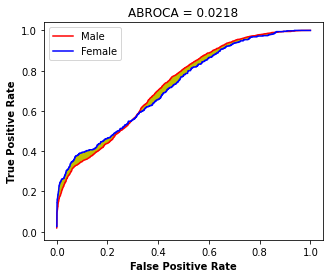

ABROCA: 0.021836589727603346


In [20]:
run_eval('adult-gender')

Equalized odds
{'balanced_accuracy': 0.6038527834451461, 'accuracy': 0.9478955568310939, 'fairness': 0.03315127847895971, 'TPR_protected': 0.18879855465221318, 'TPR_non_protected': 0.21930042173158026, 'TNR_protected': 0.9961944739148485, 'TNR_non_protected': 0.9935450625152559}
Statistical parity
{'balanced_accuracy': 0.6038527834451461, 'accuracy': 0.9478955568310939, 'fairness': 0.019020311584695068, 'Positive_prot_pred': 0.008411109861688968, 'Positive_non_prot_pred': 0.02743142144638404, 'Negative_prot_pred': 0.9915888901383111, 'Negative_non_prot_pred': 0.972568578553616}


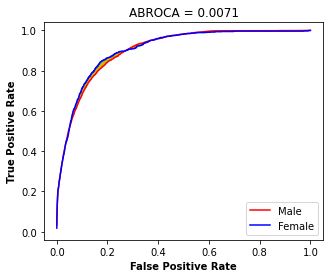

ABROCA: 0.007130919631565035


In [23]:
run_eval("kdd")

Equalized odds
{'balanced_accuracy': 0.5833114254166886, 'accuracy': 0.7133333333333334, 'fairness': 0.13031076588550994, 'TPR_protected': 0.9830508474576272, 'TPR_non_protected': 0.8866666666666667, 'TNR_protected': 0.27586206896551724, 'TNR_non_protected': 0.24193548387096775}
Statistical parity
{'balanced_accuracy': 0.5833114254166886, 'accuracy': 0.7133333333333334, 'fairness': -0.04867066895368777, 'Positive_prot_pred': 0.8977272727272727, 'Positive_non_prot_pred': 0.8490566037735849, 'Negative_prot_pred': 0.10227272727272728, 'Negative_non_prot_pred': 0.1509433962264151}


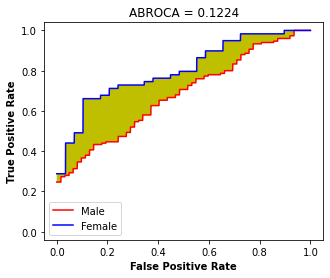

ABROCA: 0.12239320340720881


In [25]:
run_eval('german')

Equalized odds
{'balanced_accuracy': 0.5719563884934399, 'accuracy': 0.8855190801533078, 'fairness': 0.026128428321054775, 'TPR_protected': 0.15274463007159905, 'TPR_non_protected': 0.17264957264957265, 'TNR_protected': 0.9848876786929884, 'TNR_non_protected': 0.9786641929499073}
Statistical parity
{'balanced_accuracy': 0.5719563884934399, 'accuracy': 0.8855190801533078, 'fairness': 0.015307378413732198, 'Positive_prot_pred': 0.029206892337773432, 'Positive_non_prot_pred': 0.04451427075150563, 'Negative_prot_pred': 0.9707931076622266, 'Negative_non_prot_pred': 0.9554857292484944}


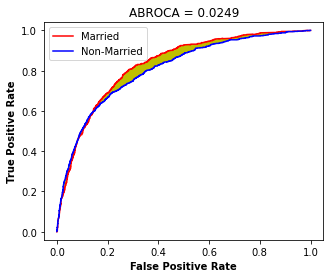

ABROCA: 0.024900119016597493


In [23]:
run_eval('bank')

Equalized odds
{'balanced_accuracy': 0.7010813260813261, 'accuracy': 0.9682804674457429, 'fairness': 0.45079136690647487, 'TPR_protected': 0.0, 'TPR_non_protected': 0.44, 'TNR_protected': 1.0, 'TNR_non_protected': 0.9892086330935251}
Statistical parity
{'balanced_accuracy': 0.7010813260813261, 'accuracy': 0.9682804674457429, 'fairness': 0.0462046204620462, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.0462046204620462, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 0.9537953795379538}


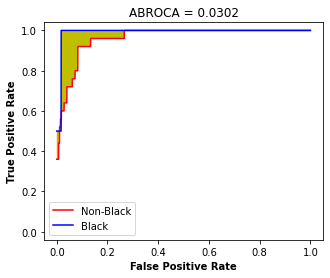

ABROCA: 0.03019816961726502


In [24]:
run_eval('crime')

Equalized odds
{'balanced_accuracy': 0.6298646667147424, 'accuracy': 0.6414141414141414, 'fairness': 0.6451739512144301, 'TPR_protected': 0.5995934959349594, 'TPR_non_protected': 0.205761316872428, 'TNR_protected': 0.679324894514768, 'TNR_non_protected': 0.9306666666666666}
Statistical parity
{'balanced_accuracy': 0.6298646667147424, 'accuracy': 0.6414141414141414, 'fairness': -0.33975557297634124, 'Positive_prot_pred': 0.46273291925465837, 'Positive_non_prot_pred': 0.12297734627831715, 'Negative_prot_pred': 0.5372670807453416, 'Negative_non_prot_pred': 0.8770226537216829}


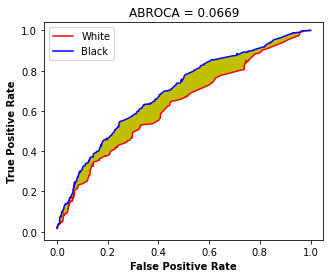

ABROCA: 0.06686011441560745


In [25]:
run_eval('compas-recid')

Equalized odds
{'balanced_accuracy': 0.5540802283500688, 'accuracy': 0.8431952662721893, 'fairness': 0.21947075166083824, 'TPR_protected': 0.1826086956521739, 'TPR_non_protected': 0.0, 'TNR_protected': 0.9606126914660832, 'TNR_non_protected': 0.9974747474747475}
Statistical parity
{'balanced_accuracy': 0.5540802283500688, 'accuracy': 0.8431952662721893, 'fairness': -0.06591937474290414, 'Positive_prot_pred': 0.06818181818181818, 'Positive_non_prot_pred': 0.0022624434389140274, 'Negative_prot_pred': 0.9318181818181818, 'Negative_non_prot_pred': 0.997737556561086}


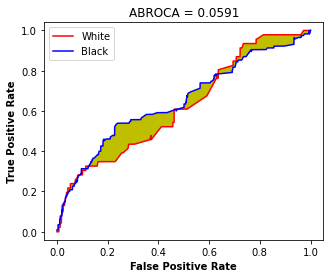

ABROCA: 0.05911035778323049


In [26]:
run_eval('compas-viol')

Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.7822222222222223, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.7822222222222223, 'fairness': 0.0, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.0, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 1.0}


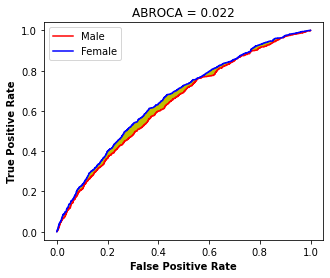

ABROCA: 0.02203739349213918


In [27]:
run_eval('credit')

Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.758439664600802, 'fairness': 0.0, 'TPR_protected': 0.0, 'TPR_non_protected': 0.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.758439664600802, 'fairness': 0.0, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.0, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 1.0}


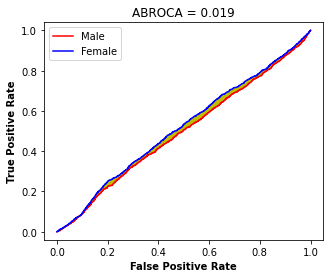

ABROCA: 0.018978909826683082


In [28]:
run_eval('diabetes')

Equalized odds
{'balanced_accuracy': 0.8138880779389103, 'accuracy': 0.8150171025046894, 'fairness': 0.37440794266550004, 'TPR_protected': 0.6988150098749177, 'TPR_non_protected': 0.838295596362988, 'TNR_protected': 0.9220566562960537, 'TNR_non_protected': 0.6871293001186239}
Statistical parity
{'balanced_accuracy': 0.8138880779389103, 'accuracy': 0.8150171025046894, 'fairness': 0.35682091510971253, 'Positive_prot_pred': 0.2841990158556588, 'Positive_non_prot_pred': 0.6410199309653714, 'Negative_prot_pred': 0.7158009841443411, 'Negative_non_prot_pred': 0.35898006903462865}


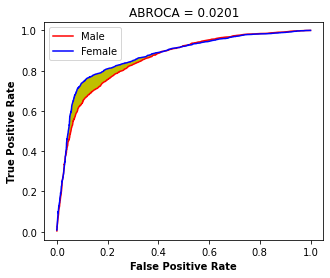

ABROCA: 0.02012738715479841


In [29]:
run_eval('dutch')

Equalized odds
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.5042999187979462, 'TPR_protected': 0.909985935302391, 'TPR_non_protected': 0.9954695222405272, 'TNR_protected': 0.525096525096525, 'TNR_non_protected': 0.10628019323671498}
Statistical parity
{'balanced_accuracy': 0.6260054807156693, 'accuracy': 0.9072115384615385, 'fairness': 0.1936618478452239, 'Positive_prot_pred': 0.7938144329896907, 'Positive_non_prot_pred': 0.9874762808349146, 'Negative_prot_pred': 0.20618556701030927, 'Negative_non_prot_pred': 0.012523719165085389}


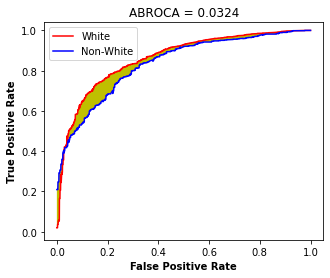

ABROCA: 0.032393564443540385


In [30]:
run_eval('law')

Equalized odds
{'balanced_accuracy': 0.5, 'accuracy': 0.6750656979440408, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.0}
Statistical parity
{'balanced_accuracy': 0.5, 'accuracy': 0.6750656979440408, 'fairness': 0.0, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 1.0, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.0}


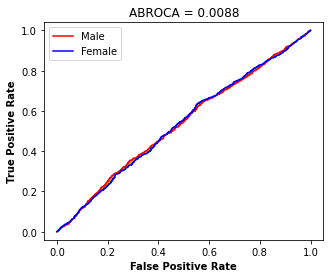

ABROCA: 0.008830867762121001


In [31]:
run_eval('oulad')

Equalized odds
{'balanced_accuracy': 1.0, 'accuracy': 1.0, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 1.0, 'accuracy': 1.0, 'fairness': 0.17142857142857137, 'Positive_prot_pred': 0.4, 'Positive_non_prot_pred': 0.5714285714285714, 'Negative_prot_pred': 0.6, 'Negative_non_prot_pred': 0.42857142857142855}


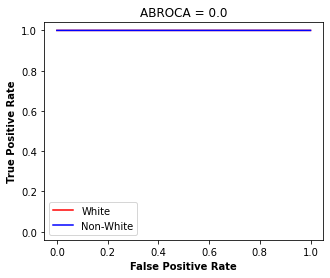

ABROCA: 0.0


In [32]:
run_eval('ricci')

Equalized odds
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.1615643050278025, 'TPR_protected': 0.9354838709677419, 'TPR_non_protected': 0.9761904761904762, 'TNR_protected': 0.9629629629629629, 'TNR_non_protected': 0.8421052631578947}
Statistical parity
{'balanced_accuracy': 0.9359737939249553, 'accuracy': 0.9411764705882353, 'fairness': 0.20407009609949123, 'Positive_prot_pred': 0.5172413793103449, 'Positive_non_prot_pred': 0.7213114754098361, 'Negative_prot_pred': 0.4827586206896552, 'Negative_non_prot_pred': 0.2786885245901639}


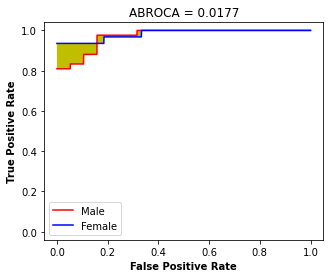

ABROCA: 0.017652299268397953


In [33]:
run_eval('student-mat')

Equalized odds
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': 0.04901703800786372, 'TPR_protected': 0.963302752293578, 'TPR_non_protected': 0.95, 'TNR_protected': 0.75, 'TNR_non_protected': 0.7142857142857143}
Statistical parity
{'balanced_accuracy': 0.8446745562130178, 'accuracy': 0.9282051282051282, 'fairness': -0.06823765914675006, 'Positive_prot_pred': 0.8925619834710744, 'Positive_non_prot_pred': 0.8243243243243243, 'Negative_prot_pred': 0.10743801652892562, 'Negative_non_prot_pred': 0.17567567567567569}


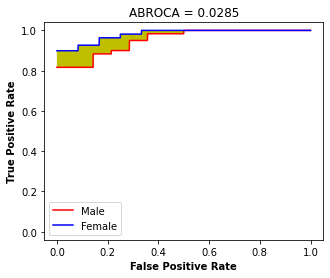

ABROCA: 0.02850650647770132


In [34]:
run_eval('student-por')

0    34542
1    11307
Name: income_bin, dtype: int64
Equalized odds
{'balanced_accuracy': 0.9621383763326734, 'accuracy': 0.9708469647400945, 'fairness': 0.014519797220210351, 'TPR_protected': 0.9436619718309859, 'TPR_non_protected': 0.9453972698634932, 'TNR_protected': 0.9870032491877031, 'TNR_non_protected': 0.97421875}
Statistical parity
{'balanced_accuracy': 0.9621383763326734, 'accuracy': 0.9708469647400945, 'fairness': 0.19377428581680195, 'Positive_prot_pred': 0.11582925744775456, 'Positive_non_prot_pred': 0.3096035432645565, 'Negative_prot_pred': 0.8841707425522455, 'Negative_non_prot_pred': 0.6903964567354435}


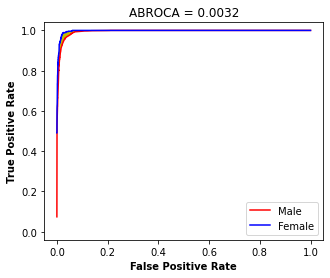

ABROCA: 0.003230040782066246


In [35]:
run_eval('adult-reconstruction')